In [72]:
# Read target_description from CSV file using Pandas
# source_user_id, target_user_id , target_description, text, timestamp
import pandas as pd
df=pd.read_csv("../retweet_12349_5columns.csv", sep=r'\s*,\s*', header=0, encoding='utf8')
#print(df.shape)
#print(df.columns.tolist())
userBios=df['target_description'].astype(str)
print(userBios)


/opt/anaconda3/envs/SNA/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


0                                          "sugar & spice"
1                 "i miss @bts_twt #BlackLivesMatter #BLM"
2                "2014. THE GENRE IS BTS. YOONMIN VISUAL."
3        "whip and neigh neigh  lesbian for goro majima...
4        "I look forward to the day you will stand and ...
                               ...                        
12344    "\ud83d\udc9cPhilippine ARMY\ud83d\udc9c #SanD...
12345    "\u1d21\u029c\u028f \u1d05\u1d0f \u026a \u029f...
12346    "mono by rm disciple. \ud0dc\ud0dc\uafb9 amour...
12347    "\ud83d\udc9c In this Bangtan Sonyeondan ish f...
12348    "\u1d35 \u1d57\u02b0\u1d52\u1d58\u1d4d\u02b0\u...
Name: target_description, Length: 12349, dtype: object


In [81]:
# clean text using NLTK
import nltk
#nltk.download()
#nltk.download('wordnet')
#nltk.download("punkt")

# Lemmatize
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

# Tweet Tokenizer
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

tokens=[]
for bio in userBios:
    token=[lemmatizer.lemmatize(t) for t in tknzr.tokenize(bio) if t.isalnum()]
    #print(token)
    tokens.append(token)
#print(tokens[:10])

[['sugar', 'spice'], ['i', 'miss'], ['2014', 'THE', 'GENRE', 'IS', 'BTS', 'YOONMIN', 'VISUAL'], ['whip', 'and', 'neigh', 'neigh', 'lesbian', 'for', 'goro', 'majima', 'and', 'kazuma', 'kiryu', 'she', 'her', 'they', 'BLM', 'NSFW', '18'], ['I', 'look', 'forward', 'to', 'the', 'day', 'you', 'will', 'stand', 'and', 'tell', 'u', 'your', 'own', 'story', 'ud83d', 'udc', '2f', 'n', 'u26ac', 'Fan', 'account', 'u26ac'], ['BTS', 'OT7', 'ud83d', 'udc', '0b', 'u27ed', 'u27ec', 'ud83d', 'udc', '9c', 'u27ec', 'u27ed', 'ud83d', 'udcc', '0', 'ud83d', 'udcc', '0', 'ud83c', 'udff', '9', 'ud83c', 'uddeb', 'ud83c', 'uddf', '7', 'ud83c', 'udf', '1f', 'ud83c', 'udf', '1f', 'she', 'her', 'nI', 'grew', 'a', 'flower', 'that', 'be', 'bloomed', 'in', 'a', 'dream', 'that', 'come', 'true'], ['Cats', 'Coffee', 'u4f98', 'u5bc2', 'Witch', 'u56db', 'u4e16', 'u30cf', 'u30d1', 'purpleblood', 'manti', 'solophobic', 'n', 'n', 'u00b0', 'u00b0', 'no', 'pronoun', 'pref', 'all', 'pronoun', 'u00b0', 'u00b0', 'n', 'n', 'n', 'u263

In [82]:
#
# compute embedding vectors from text
import numpy as np
from embedding_as_service.text.encode import Encoder

#embed = Encoder(embedding='bert', model='bert_base_uncased', download=True) 
embed = Encoder(embedding='word2vec', model='google_news_300')
vecs = embed.encode(tokens, is_tokenized=True)
vecs = np.squeeze(vecs)
vecs.shape


  0%|          | 1884/3000000 [00:00<02:39, 18836.25it/s]

Loading Model (this might take few minutes).....



 15%|█▍        | 447541/3000000 [00:27<02:48, 15183.52it/s]


 29%|██▉       | 866431/3000000 [00:56<05:03, 7021.70it/s]


 42%|████▏     | 1270183/3000000 [01:23<01:45, 16368.41it/s]


 57%|█████▋    | 1695504/3000000 [01:50<01:23, 15639.44it/s]


 70%|███████   | 2103479/3000000 [02:16<00:59, 15108.13it/s]


 83%|████████▎ | 2494497/3000000 [02:43<00:35, 14067.55it/s]


 95%|█████████▌| 2850396/3000000 [03:19<05:49, 427.75it/s]


100%|██████████| 3000000/3000000 [03:44<00:00, 13344.68it/s]

Model loaded Successfully !


(12349, 128, 300)

In [93]:
# compute cos similarity between two tweets
from sklearn.metrics.pairwise import cosine_similarity
tw1=vecs[0].reshape(1,-1)
tw2=vecs[1].reshape(1,-1)
print('CosSim(Tweet[0], Tweet[100])', cosine_similarity(tw1, tw2))



CosSim(Tweet[0], Tweet[100]) [[0.05722134]]
(38400,)


In [106]:
import numpy as np
flatten_vecs = []
for v in vecs:
    flatten_vecs.append(v.flatten())
             
np_word2vec = np.array(flatten_vecs)


In [107]:
#print(np_word2vec[:100,0])

[-0.1875     -0.22558594  0.          0.05688477  0.07910156 -0.24414062
 -0.01281738  0.0324707   0.         -0.20507812  0.          0.08837891
  0.         -0.16210938  0.28125     0.          0.         -0.16992188
 -0.22558594  0.          0.          0.          0.          0.00215149
 -0.16992188  0.          0.03320312  0.         -0.10595703 -0.10595703
 -0.14648438 -0.22558594  0.28125     0.0324707   0.          0.
  0.00393677  0.          0.00393677 -0.01489258 -0.16503906  0.2109375
  0.10107422  0.05834961 -0.02941895  0.0703125   0.10107422  0.07910156
 -0.17285156 -0.17578125 -0.06591797  0.20117188  0.07910156 -0.22558594
  0.1875     -0.07666016  0.0324707   0.          0.          0.
  0.          0.09960938  0.00704956 -0.16503906  0.09960938 -0.07568359
 -0.03662109  0.0324707   0.          0.          0.          0.0324707
  0.          0.          0.         -0.07568359 -0.01489258 -0.07226562
 -0.07568359 -0.05419922 -0.16503906  0.          0.          0.07910

In [101]:
!pip install matplotlib

     |████████████████████████████████| 8.5 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 6.2 MB/s eta 0:00:01
  Using cached Pillow-8.0.1-cp37-cp37m-macosx_10_10_x86_64.whl (2.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


[0 0 4 ... 0 0 0]


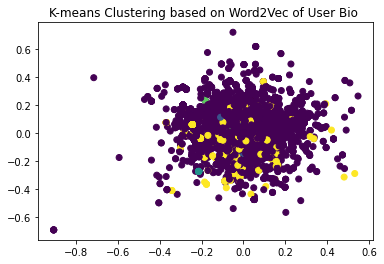

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X=np_word2vec

kmean = KMeans(5).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmean.labels_.astype(float))
plt.title("K-means Clustering based on Word2Vec of User Bio ")


print(kmean.labels_)


In [ ]:
#PCA-assisted k-Means Clustering
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
from sklearn.decomposition import PCA
pca = PCA(n_components=5).fit(X)
bench_k_means(KMeans(init=pca.components_, n_clusters=5, n_init=1),
              name="PCA-based",
              data=X)